# Home Work 6
### The problems in this homework have been solved using the Keras neural network package of the Python language.

## Question 2

First we will load the dataset and see the first few rows.

In [39]:
import pandas as pd
goals_data = pd.read_excel('goals.xls')
goals_data.head()

,Distance,Weather,Wind15,Temperature,Grass,Pressure,Ice,Good
1,29,Sun,0,Nice,1,N,0,Y
2,33,Sun,0,Nice,1,N,0,Y
3,25,Sun,0,Nice,1,N,0,N
4,23,Sun,0,Nice,1,N,0,Y
5,48,Sun,0,Nice,1,N,0,N


The table above shows that the dataset has been loaded successfully. It can be seen that the "Pressure" and the "Good" Columns are categorical columns. In Keras, data needs to be numerical. As a result, we will use map methods to convert those categorical columns to their numerical counterparts. As far as the Pressure column is concerned, we will consider "Y" to be 1.0 and "N" to be 0.0. Similarly, for the Good column, "Y" will be considered to be 1.0 and "N" will be considered to be 0.0.

In [40]:
# %%
goals_data['Pressure'] = goals_data['Pressure'].map({"Y": 1, "N": 0})
goals_data['Good'] = goals_data['Good'].map({"Y": 1, "N": 0})
goals_data.head()

,Distance,Weather,Wind15,Temperature,Grass,Pressure,Ice,Good
1,29,Sun,0,Nice,1,0,0,1
2,33,Sun,0,Nice,1,0,0,1
3,25,Sun,0,Nice,1,0,0,0
4,23,Sun,0,Nice,1,0,0,1
5,48,Sun,0,Nice,1,0,0,0


The dataset above shows that the categorical columns have been converted to their numerical counterparts. The columns "Weather" and "Temperature" have values across more than 2 categories and hence they would be converted into more than 2 indicator variables.

In [41]:
# %%
# Converting multiclass categorical input data into numerical data
goals_data_dummied = pd.get_dummies(goals_data)
goals_data_dummied.head()

,Distance,Wind15,Grass,Pressure,Ice,Good,Weather_Clouds,Weather_Inside,Weather_SnowRain,Weather_Sun,Temperature_Cold,Temperature_Hot,Temperature_Nice
1,29,0,1,0,0,1,0,0,0,1,0,0,1
2,33,0,1,0,0,1,0,0,0,1,0,0,1
3,25,0,1,0,0,0,0,0,0,1,0,0,1
4,23,0,1,0,0,1,0,0,0,1,0,0,1
5,48,0,1,0,0,0,0,0,0,1,0,0,1


We will then divide the dataset into input features and output targets as follows.

In [42]:
# %%
goals_features = goals_data_dummied.drop(['Good'], axis=1, inplace=False)
goals_targets = pd.DataFrame(goals_data_dummied['Good'], columns=['Good'])
print("\n Goal Features: ")
print(goals_features.head())


 Goal Features: 
   Distance  Wind15  Grass  Pressure  Ice  Weather_Clouds  Weather_Inside  \
1        29       0      1         0    0               0               0   
2        33       0      1         0    0               0               0   
3        25       0      1         0    0               0               0   
4        23       0      1         0    0               0               0   
5        48       0      1         0    0               0               0   

   Weather_SnowRain  Weather_Sun  Temperature_Cold  Temperature_Hot  \
1                 0            1                 0                0   
2                 0            1                 0                0   
3                 0            1                 0                0   
4                 0            1                 0                0   
5                 0            1                 0                0   

   Temperature_Nice  
1                 1  
2                 1  
3                 1  
4   

In [43]:
print("\n Goal Targets")
print(goals_targets.head())


 Goal Targets
   Good
1     1
2     1
3     0
4     1
5     0


All the columns in the dataset represent variables with different scales. Generally, for machine learning algorithms, it is advisable to scale all the variables across different categories within the same range so that large deviations of one variable do not adversely affect the performance of the algorithm. Therefore, using min-max scaling, we will scale all the variables in the dataset in the range [0, 1]. Consequently our feature and target variables would be values in that range as shown below.

In [44]:
# %%
from sklearn import preprocessing

feature_scaler = preprocessing.MinMaxScaler()
scaled_goals_features = pd.DataFrame(data=feature_scaler.fit_transform(goals_features),
                                     columns=goals_features.columns.values)
# %%
target_scaler = preprocessing.MinMaxScaler()
scaled_goals_targets = pd.DataFrame(data=target_scaler.fit_transform(goals_targets),
                                    columns=goals_targets.columns.values)
print("\n The following are the scaled features: ")
print(scaled_goals_features.head())
# print("\n The following are the scaled targets: ")
# print(scaled_goals_targets.head())


 The following are the scaled features: 
   Distance  Wind15  Grass  Pressure  Ice  Weather_Clouds  Weather_Inside  \
0  0.250000     0.0    1.0       0.0  0.0             0.0             0.0   
1  0.340909     0.0    1.0       0.0  0.0             0.0             0.0   
2  0.159091     0.0    1.0       0.0  0.0             0.0             0.0   
3  0.113636     0.0    1.0       0.0  0.0             0.0             0.0   
4  0.681818     0.0    1.0       0.0  0.0             0.0             0.0   

   Weather_SnowRain  Weather_Sun  Temperature_Cold  Temperature_Hot  \
0               0.0          1.0               0.0              0.0   
1               0.0          1.0               0.0              0.0   
2               0.0          1.0               0.0              0.0   
3               0.0          1.0               0.0              0.0   
4               0.0          1.0               0.0              0.0   

   Temperature_Nice  
0               1.0  
1               1.0  
2 

Now the dataset is appropriately preprocessed for input into a neural network algorithm. We will now divide the dataset into a training and testing set, keeping 10 of the data points for future testing and the remaining for training the network. We will form a neural network with a single hidden layer with inputs from the scaled features and outputs leading to 2 nodes representing the the outputs of a softmax activation function across 2 categories, namely a successfull goal attempt and an unsuccessfull goal attempt. The optimizer used for the model will be a stochastic gradient descent optimizer that would be trying to maximise the accuracy of this binary classification problem. The learning rate and momentum for the minimization problem would be, as suggested in the question, 0.7 and 0.8 respectively. The number of cycles, or epochs would be 5000.

In [45]:
# %%
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(scaled_goals_features, goals_targets,
                                                random_state=42,
                                                test_size=0.12)
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras import optimizers

sgd = optimizers.SGD(lr=0.7)
model = Sequential()
# My model
model.add(Dense(256, activation='relu', input_shape=(12,)))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3328      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total para

The output above shows that the resulting model with a total of 44,610 parametric weights and biases to be trained. We then train the model with our training data for 5000 cycles (epochs in Keras terms) as follows.

In [48]:
# %%
import numpy as np

train_features = np.array(xtrain)
test_features = np.array(xtest)

final_targets_train = np.array(keras.utils.to_categorical(ytrain, 2))
final_targets_test = np.array(keras.utils.to_categorical(ytest, 2))

model.fit(train_features, final_targets_train, epochs=5000, batch_size=10, verbose=0)

Now that the model has been trained, it is time to see how much is the accuracy when our model is tested on the initially separated 10 testing datasets.

In [52]:
# Evaluating the model on the testing set
score = model.evaluate(test_features, final_targets_test)
print("\n Accuracy Score:", score[1])

241/241 [==============================] - 0s 37us/step

 Accuracy Score: 0.7800829880465115


It can be observed that the accuracy of prediction for the testing data shown above is quite high, an indication that we have ended up with a good predictive model. Now it is time to test our sample data. According to the question, for the sample data:

Distance:57; Weather:SnowRain; Wind15:true; Temperature:Cold; Grass:true; Pressure:Y; Ice:true. 

we can convert the sampled data into its scaled version and then feed into the trained neural network to give us a prediction as to whether the goal attempt would be successfull or not.

In [55]:
# %%
# Testing our sample data
sample = np.array([[57, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]])
sample_df = pd.DataFrame(sample, columns=xtrain.columns.values)
scaled_sample_data = pd.DataFrame(feature_scaler.transform(sample_df),
                                  columns=sample_df.columns.values)
sample_prediction = model.predict(np.array(scaled_sample_data))
print(f"The prediction sigmoid probability of the output for the sample test data: {sample_prediction[0][1]}")

The prediction sigmoid probability of the output for the sample test data: 0.0009026780026033521


#### From the above cell, it can be observed that there is a very low probability that the goal attempt will be successfull due to the predicted output value for the Goal which can be considered to be zero (value = 0.0009). A value of 0 for the goal means the attempt has a value of "N" which in turn means an unsuccessfull goal attempt.

We can observe the performance of our trained neural network model to ensure it did infact give us a good predictive system, by looking at the trend of the accuracy over the 5000 cycles/epoch as follows.

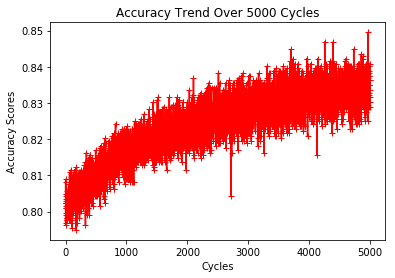

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy_history = model.history.history['acc']
plt.plot(accuracy_history, marker='+', color='r')
plt.xlabel("Cycles")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Trend Over 5000 Cycles")
plt.show()


It can be observed from the graph above that our trained model did infact improve over the 5000 cycles.

## Answer (part a)

### The goal attempt is predicted to be NOT successfull.

## Answer (part b)

With all other inputs remaining constant, let us find out the approximate maximum distance for which the field goal attempt is predicted to be successfull. We will do that by trial and error, decreasing the distance by a single unit until the prediction value for the Good column becomes close to 1.0 (i.e "Y").

In [81]:
sample = np.array([[47, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]])
sample_df = pd.DataFrame(sample, columns=xtrain.columns.values)
scaled_sample_data = pd.DataFrame(feature_scaler.transform(sample_df),
                                  columns=sample_df.columns.values)
sample_prediction = model.predict(np.array(scaled_sample_data))
print(f"The prediction sigmoid probability of the output for the sample test data: {sample_prediction[0][1]}")

The prediction sigmoid probability of the output for the sample test data: 0.9446671009063721


#### It can be observed from the cell above that gradually decreasing the distance by 1 unit every step gives us an approximately successfull goal attempt (sigmoid probability = 0.944 and hence can be considered to be 1.0) at a distance of around 47 yards. It is obvious that decreasing the distance further will push that predicted sigmoid probability even more towards unity.